In [91]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

conn = sqlite3.connect('../simulations.db')
c = conn.cursor()

In [ ]:
# Distribution of max_number_of_same_prices
c.execute('SELECT max_number_of_same_prices, COUNT(*) FROM simulations GROUP BY max_number_of_same_prices')
rows = c.fetchall()
max_number_of_same_prices = [row[0] for row in rows]
count = [row[1] for row in rows]

In [ ]:
print(max_number_of_same_prices)
print(count)

In [ ]:
# Plot
max_number_of_same_prices_2 = max_number_of_same_prices
count_2 = count
plt.scatter(max_number_of_same_prices_2, count_2)
# logaritmic scale
plt.yscale('log')
plt.xlabel('Max number of same prices')
plt.ylabel('Count')
plt.title('Distribution of max number of same prices')
plt.show()

In [16]:
# Histogram of max_number_of_same_prices
max_number_of_same_prices = [row[0] for row in c.execute('SELECT max_number_of_same_prices FROM simulations')]

In [ ]:
plt.hist(max_number_of_same_prices)
plt.xlabel('Max number of same prices')
plt.ylabel('Count')
plt.title('Histogram of max number of same prices')
plt.show()

In [ ]:
# How many simulations have max_number_of_same_prices = 1 compared to the total number of simulations
c.execute('SELECT COUNT(*) FROM simulations WHERE max_number_of_same_prices = 1')
count = c.fetchone()[0]
total = c.execute('SELECT COUNT(*) FROM simulations').fetchone()[0]
print(count / total)

In [21]:
query = """
SELECT sigma,
       AVG(CASE WHEN max_number_of_same_prices = 1 THEN 1.0 ELSE 0 END) AS ratio
FROM simulations
GROUP BY sigma
ORDER BY sigma;
"""
c.execute(query)
ratio_sigma = c.fetchall()
sigmas = [row[0] for row in ratio_sigma]
ratios_sigma = [row[1] for row in ratio_sigma]

In [ ]:
plt.bar(sigmas, ratios_sigma, width=0.04, align='center', edgecolor='black')
selected_ticks = sigmas[::2]
selected_labels = [f"{sigma:.2f}" for sigma in selected_ticks]
plt.xticks(selected_ticks, selected_labels)
plt.xlabel('Sigma')
plt.ylabel('max_number_of_same_prices = 1 / total in group')
plt.show()

In [23]:
query = """
SELECT mu,
       AVG(CASE WHEN max_number_of_same_prices = 1 THEN 1.0 ELSE 0 END) AS ratio
FROM simulations
GROUP BY mu
ORDER BY mu;
"""
c.execute(query)
ratio_mu = c.fetchall()
mus = [row[0] for row in ratio_mu]
ratios_mu = [row[1] for row in ratio_mu]

In [ ]:
plt.bar(mus, ratios_mu, width=0.04, align='center', edgecolor='black')
plt.xticks(mus, [f"{mu:.2f}" for mu in mus])
plt.xlabel('Mu')
plt.ylabel('max_number_of_same_prices = 1 / total in group')
plt.show()

In [29]:
query = """
SELECT theta,
       AVG(CASE WHEN max_number_of_same_prices = 1 THEN 1.0 ELSE 0 END) AS ratio
FROM simulations
GROUP BY theta
ORDER BY theta;
"""
c.execute(query)
ratio_theta = c.fetchall()
thetas = [row[0] for row in ratio_theta]
ratios_theta = [row[1] for row in ratio_theta]

In [ ]:
plt.bar(thetas, ratios_theta, width=0.04, align='center', edgecolor='black')
selected_ticks = thetas[::2]
selected_labels = [f"{theta:.2f}" for theta in selected_ticks]
plt.xticks(selected_ticks, selected_labels)
plt.xlabel('Theta')
plt.ylabel('max_number_of_same_prices = 1 / total in group')
plt.show()

In [31]:
query = """
SELECT kappa,
       AVG(CASE WHEN max_number_of_same_prices = 1 THEN 1.0 ELSE 0 END) AS ratio
FROM simulations
GROUP BY kappa
ORDER BY kappa;
"""
c.execute(query)
ratio_kappa = c.fetchall()
kappas = [row[0] for row in ratio_kappa]
ratios_kappa = [row[1] for row in ratio_kappa]

In [ ]:
plt.bar(kappas, ratios_kappa, width=0.04, align='center', edgecolor='black')
plt.xticks(kappas, [f"{kappa:.2f}" for kappa in kappas])
plt.xlabel('Kappa')
plt.ylabel('max_number_of_same_prices = 1 / total in group')
plt.show()

In [34]:
query = """
SELECT rho,
       AVG(CASE WHEN max_number_of_same_prices = 1 THEN 1.0 ELSE 0 END) AS ratio
FROM simulations
GROUP BY rho
ORDER BY rho;
"""
c.execute(query)
ratio_rho = c.fetchall()
rhos = [row[0] for row in ratio_rho]
ratios_rho = [row[1] for row in ratio_rho]

In [ ]:
plt.bar(rhos, ratios_rho, width=0.04, align='center', edgecolor='black')
selected_ticks = rhos[::2]
selected_labels = [f"{rho:.2f}" for rho in selected_ticks]
plt.xticks(selected_ticks, selected_labels)
plt.xlabel('Rho')
plt.ylabel('max_number_of_same_prices = 1 / total in group')
plt.show()

In [36]:
query = """
SELECT v0,
       AVG(CASE WHEN max_number_of_same_prices = 1 THEN 1.0 ELSE 0 END) AS ratio
FROM simulations
GROUP BY v0
ORDER BY v0;
"""
c.execute(query)
ratio_v0 = c.fetchall()
v0s = [row[0] for row in ratio_v0]
ratios_v0 = [row[1] for row in ratio_v0]

In [ ]:
plt.bar(v0s, ratios_v0, width=0.04, align='center', edgecolor='black')
selected_ticks = v0s[::2]
selected_labels = [f"{v0:.2f}" for v0 in selected_ticks]
plt.xticks(selected_ticks, selected_labels)
plt.xlabel('v0')
plt.ylabel('max_number_of_same_prices = 1 / total in group')
plt.show()

In [38]:
query = """
SELECT (2.0 * kappa * theta - sigma * sigma) AS feller_diff,
       AVG(CASE WHEN max_number_of_same_prices = 1 THEN 1.0 ELSE 0 END) AS ratio
FROM simulations
GROUP BY feller_diff
ORDER BY feller_diff;
"""
c.execute(query)
results_feller_diff = c.fetchall()
feller_diffs = [row[0] for row in results_feller_diff]
ratios_feller_diff = [row[1] for row in results_feller_diff]

In [ ]:
plt.scatter(feller_diffs, ratios_feller_diff)
plt.xlabel('2*kappa*theta - sigma^2 (Distance to Feller condition)')
plt.ylabel('max_number_of_same_prices = 1 / total in group')
plt.show()

In [70]:
def plot_p_value(variant, plot_title, max_number_of_same_prices=None):
    query = f"SELECT {variant}_p FROM simulations WHERE {variant}_p IS NOT NULL AND {variant}_stat IS NOT NULL"
    if max_number_of_same_prices:
        query += f" AND max_number_of_same_prices < {max_number_of_same_prices}"
    c.execute(query)
    results = c.fetchall()
    p_values = [row[0] for row in results]

    plt.hist(p_values, bins=30, edgecolor='black')
    plt.xlabel('p-value')
    plt.ylabel('Count')
    plt.title(plot_title)
    plt.show()

In [ ]:
plot_p_value('GC_cum_KS', 'p-values Gram-Charlier with Cumulants and KS-Test')

In [ ]:
plot_p_value('GC_cum_KS', 'p-values Gram-Charlier with Cumulants and KS-Test without invalid sims', 10)

In [ ]:
plot_p_value('GC_mom_KS', 'p-values Gram-Charlier with Moments and KS-Test')

In [ ]:
plot_p_value('GC_pos_cum_KS', 'p-values Positivity Gram-Charlier with Cumulants and KS-Test')

In [ ]:
plot_p_value('GC_pos_mom_KS', 'p-values Positivity Gram-Charlier with Moments and KS-Test')

In [ ]:
plot_p_value('EW_cum_KS', 'p-values Edgeworth with Cumulants and KS-Test')

In [ ]:
plot_p_value('EW_mom_KS', 'p-values Edgeworth with Moments and KS-Test')

In [ ]:
plot_p_value('EW_pos_cum_KS', 'p-values Positivity Edgeworth with Cumulants and KS-Test')

In [ ]:
plot_p_value('EW_pos_mom_KS', 'p-values Positivity Edgeworth with Moments and KS-Test')

In [ ]:
plot_p_value('CF_cum_KS', 'p-values Cornish-Fisher with Cumulants and KS-Test')

In [ ]:
plot_p_value('CF_mom_KS', 'p-values Cornish-Fisher with Moments and KS-Test')

In [ ]:
plot_p_value('SP_cum_KS', 'p-values Saddlepoint with Cumulants and KS-Test')

In [ ]:
plot_p_value('SP_mom_KS', 'p-values Saddlepoint with Moments and KS-Test')

In [81]:
def plot_2d_p_value(variant, dim1, dim2, plot_title, max_number_of_same_prices=None):
    if max_number_of_same_prices:
        query = f"""
        SELECT {dim1}, 
            {dim2}, 
            AVG(CASE WHEN GC_cum_KS_p > 0.05 THEN 1.0 ELSE 0 END) AS ratio
        FROM simulations
        WHERE {variant}_p IS NOT NULL AND {variant}_stat IS NOT NULL AND max_number_of_same_prices < {max_number_of_same_prices}
        GROUP BY {dim1}, {dim2}
        ORDER BY {dim1}, {dim2};
        """
    else:
        query = f"""
        SELECT {dim1}, 
            {dim2}, 
            AVG(CASE WHEN GC_cum_KS_p > 0.05 THEN 1.0 ELSE 0 END) AS ratio
        FROM simulations
        WHERE {variant}_p IS NOT NULL AND {variant}_stat IS NOT NULL
        GROUP BY {dim1}, {dim2}
        ORDER BY {dim1}, {dim2};
        """
    c.execute(query)
    data = c.fetchall()

    # Extrahiere die Werte
    dim1s = [row[0] for row in data]
    dim2s = [row[1] for row in data]
    ratios = [row[2] for row in data]

    # Erstelle den Scatterplot
    sc = plt.scatter(dim1s, dim2s, c=ratios, cmap='viridis', s=100, edgecolors='black')
    plt.xlabel(dim1)
    plt.ylabel(dim2)
    plt.title(plot_title)
    plt.colorbar(sc, label='Ratio p-value > 5%')
    plt.show()

In [ ]:
plot_2d_p_value('GC_cum_KS', 'sigma', 'kappa', 'Ratio of Simulations with KS-Test p-value > 5% and Gram-Charlier Cumulants', 10)

In [ ]:
plot_2d_p_value('GC_cum_KS', 'sigma', 'theta', 'Ratio of Simulations with KS-Test p-value > 5% and Gram-Charlier Cumulants', 10)

In [ ]:
plot_2d_p_value('GC_cum_KS', 'sigma', 'rho', 'Ratio of Simulations with KS-Test p-value > 5% and Gram-Charlier Cumulants', 10)

In [ ]:
plot_2d_p_value('GC_cum_KS', 'sigma', 'v0', 'Ratio of Simulations with KS-Test p-value > 5% and Gram-Charlier Cumulants', 10)

In [ ]:
plot_2d_p_value('GC_cum_KS', 'sigma', 'mu', 'Ratio of Simulations with KS-Test p-value > 5% and Gram-Charlier Cumulants', 10)

In [ ]:
plot_2d_p_value('GC_cum_KS', 'kappa', 'theta', 'Ratio of Simulations with KS-Test p-value > 5% and Gram-Charlier Cumulants', 10)

In [ ]:
plot_2d_p_value('GC_cum_KS', 'kappa', 'rho', 'Ratio of Simulations with KS-Test p-value > 5% and Gram-Charlier Cumulants', 10)

In [ ]:
plot_2d_p_value('GC_cum_KS', 'kappa', 'v0', 'Ratio of Simulations with KS-Test p-value > 5% and Gram-Charlier Cumulants', 10)

In [ ]:
plot_2d_p_value('GC_cum_KS', 'theta', 'rho', 'Ratio of Simulations with KS-Test p-value > 5% and Gram-Charlier Cumulants', 10)

In [ ]:
plot_2d_p_value('GC_cum_KS', 'theta', 'v0', 'Ratio of Simulations with KS-Test p-value > 5% and Gram-Charlier Cumulants', 10)

/var/folders/2j/9q1mplxx1zn9z2vzxvy9nr340000gn/T/ipykernel_13390/599261720.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.88, 0.95])


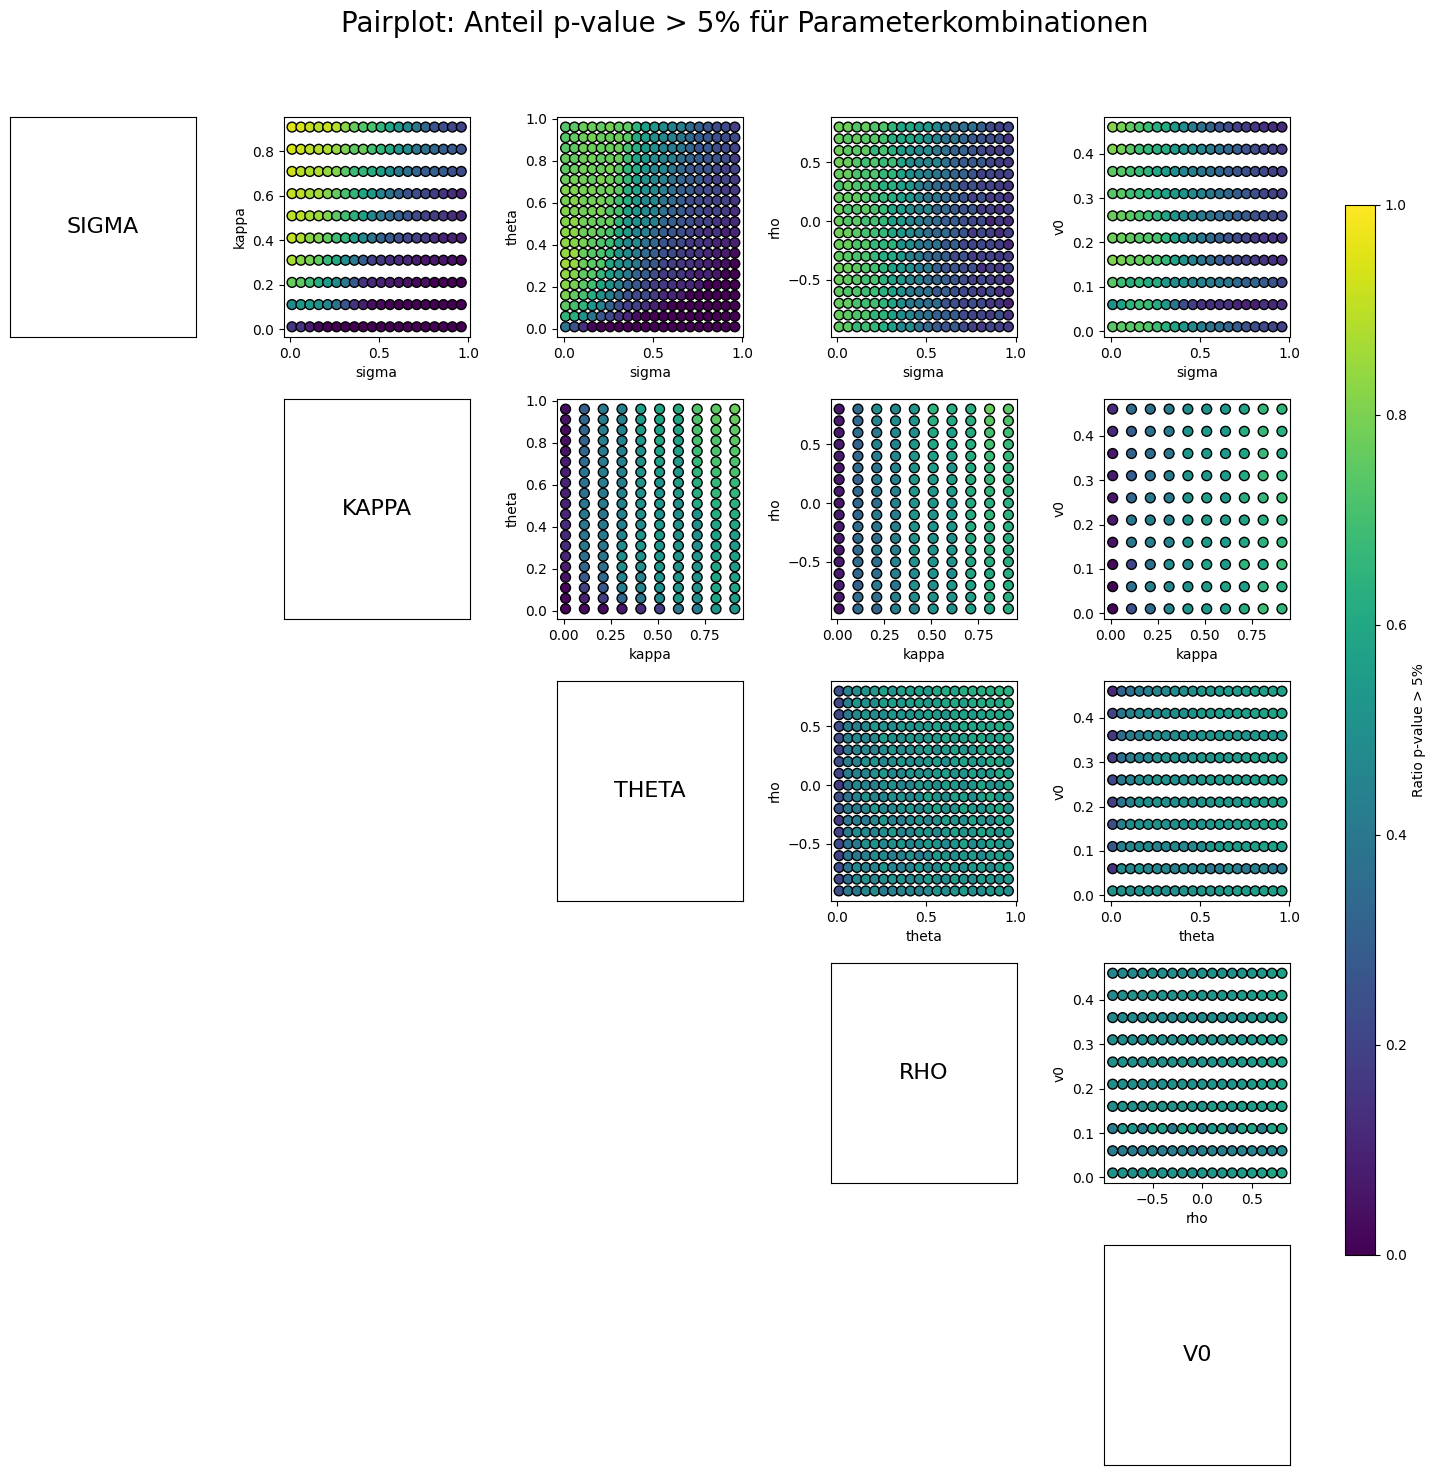

In [92]:
params = ['sigma', 'kappa', 'theta', 'rho', 'v0']
n = len(params)

# Erzeuge eine 5x5-Subplotmatrix
fig, axes = plt.subplots(n, n, figsize=(15, 15))

# Iteriere über alle Zellen der Matrix
for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        # Auf der Hauptdiagonalen: Parametername anzeigen (groß)
        if i == j:
            ax.text(0.5, 0.5, params[i].upper(), fontsize=16,
                    horizontalalignment='center', verticalalignment='center')
            ax.set_xticks([])
            ax.set_yticks([])
        # Im oberen Dreieck: Scatterplot mit den Daten zu den beiden Parametern
        elif i < j:
            dim1 = params[i]
            dim2 = params[j]
            query = f"""
            SELECT {dim1}, {dim2},
                   AVG(CASE WHEN GC_cum_KS_p > 0.05 THEN 1.0 ELSE 0 END) AS ratio
            FROM simulations
            WHERE GC_cum_KS_p IS NOT NULL AND GC_cum_KS_stat IS NOT NULL AND max_number_of_same_prices < 10
            GROUP BY {dim1}, {dim2}
            ORDER BY {dim1}, {dim2};
            """
            c.execute(query)
            data = c.fetchall()
            if data:
                x_vals = [row[0] for row in data]
                y_vals = [row[1] for row in data]
                ratios = [row[2] for row in data]
                sc = ax.scatter(x_vals, y_vals, c=ratios, cmap='viridis',
                                s=50, edgecolors='black', vmin=0, vmax=1)
            ax.set_xlabel(dim1)
            ax.set_ylabel(dim2)
        # Im unteren Dreieck: Zelle ausblenden
        else:
            ax.axis('off')

# Füge eine gemeinsame Colorbar hinzu
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
sm = cm.ScalarMappable(cmap='viridis', norm=colors.Normalize(vmin=0, vmax=1))
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label='Ratio p-value > 5%')

plt.suptitle('Pairplot: Anteil p-value > 5% für Parameterkombinationen', fontsize=20)
plt.tight_layout(rect=[0, 0, 0.88, 0.95])
plt.show()